In [1]:
# Impot the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.17554888049918 99.3146711014823
79.39588017589665 -146.19171953364656
74.55733835855645 24.729554051743293
61.24693059920958 -6.264994689559671
16.628937075377237 -51.612254981844785
42.15608196734365 -3.430642053433303
-79.08379893174542 21.763236402638597
45.42211216945586 49.03710916481262
60.74603132792819 117.39259021245255
88.34800919842974 28.19464470740698
-69.88791966302928 153.323067431634
-72.74421730306695 143.08832337359166
-32.11297171688574 107.81007179547345
-2.290260526164971 164.04611731362792
64.42462307743111 175.7942791948954
-76.58439304678382 168.656956147779
-2.3631636752173364 10.223555156869907
-35.83987161458784 -179.70996456643147
8.856620097093113 110.22096727376288
-74.18852214725548 14.899814200429432
-14.435996443660486 116.30360163564143
42.242160455072934 152.84055783203002
1.62130736376686 -176.1224653533545
-68.3614111947148 -102.51495719276357
-52.158982156804136 -4.8203659773508605
77.31395231127948 -24.25048834749353
-57.29205612333675 -85.9151

59.853549898126545 -43.63018131604491
64.91896211710812 -96.59246964413344
15.841001091538843 32.30431502991851
-83.90420659376099 17.932758528901417
78.3665675203491 17.946624686627075
-31.97850601215618 -9.968649269052008
-43.44043453645407 24.047124056523444
2.4901410969226134 102.23313754565982
20.25339426065497 23.4790059705972
79.39008690655388 -99.56558018668468
72.12937197314432 -47.45270956708012
23.933519601561997 -89.52299227788848
-16.123933840996017 133.73771086899097
-6.507037650827073 -5.180784461972735
-59.20695616037521 -26.572935667048853
-25.350153175288995 21.06418793973893
-16.272728911400264 132.50515696846497
12.327686967836044 -18.829808116496025
-8.274290354424465 105.13832686293802
-51.586283271217425 -50.60037537940667
-69.03751021574597 -6.928088754700582
22.099535044867565 -75.21412445234913
-32.1632168238614 140.71005241105246
-39.7059067869889 -157.7426257727531
-63.65207376485449 -123.152175636573
-45.13419182467914 25.568756991563276
-27.894560175321118

-21.563889858947192 -30.295144341219242
34.73904780302357 67.75389010197046
-29.047733571905667 -43.706346502591146
-59.31132637548607 -78.16687943656095
-48.7717523006746 -77.94598710947916
32.27098590860609 136.45229457544673
-59.39783564936116 78.15791545765012
-62.33601069302193 -161.3369369777559
-33.68731817109344 136.07643091176004
-70.14031932548701 -170.2006921261492
-25.82368100143998 -133.79743983260033
36.9767632813096 120.8364349839996
-42.81350227044302 -138.10641697150947
-63.31586349205304 -62.29569120060307
-68.41009497499272 -153.19631405083751
-79.40011521409384 60.45134599750983
30.133985708803053 -154.84291304369123
-25.969216933017634 -141.900595351666
76.6162166561931 -93.8332531536955
-73.2845561960303 -168.87932985514237
-59.49803513644497 -137.41321186898313
1.3968919434994262 179.34300827098468
-7.114371887621203 14.915690888259348
2.171667308483663 -169.16295805113865
-65.80133891842358 136.6691409504457
44.34420896215778 -83.97363740529003
-79.6987275702888

In [5]:
# Import the citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

# Get the City Weather Data

In [7]:
# Import your requests ibrary and the weather_api_key
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | havoysund
Processing Record 4 of Set 1 | vagur
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | burgos
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | kirovskiy
Processing Record 9 of Set 1 | suntar
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | auki
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | gamba
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | phan thiet
Processing Record 19 of Set 1 | praya
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 1 | punta arenas
P

Processing Record 34 of Set 4 | constitucion
Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | monforte de lemos
Processing Record 37 of Set 4 | macusani
Processing Record 38 of Set 4 | tikhvin
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | warmbad
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | miri
Processing Record 47 of Set 4 | mocuba
Processing Record 48 of Set 4 | pontianak
Processing Record 49 of Set 4 | butte
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | nikolskoye
Processing Record 2 of Set 5 | kungurtug
Processing Record 3 of Set 5 | kirillov
Processing Record 4 of Set 5 | tisul
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | ambilobe
Pr

Processing Record 27 of Set 8 | cochrane
Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | spring hill
Processing Record 30 of Set 8 | coatzintla
Processing Record 31 of Set 8 | lagos
Processing Record 32 of Set 8 | ranong
Processing Record 33 of Set 8 | carrascal
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | alta floresta
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | kudahuvadhoo
Processing Record 38 of Set 8 | churapcha
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | oreoi
Processing Record 42 of Set 8 | santa cruz del sur
Processing Record 43 of Set 8 | smolensk
Processing Record 44 of Set 8 | kholtoson
Processing Record 45 of Set 8 | cherbourg
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | peachland
Processing Record 48 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 8 | petropavlovsk-kamch

Processing Record 16 of Set 12 | grand centre
City not found. Skipping...
Processing Record 17 of Set 12 | daxian
City not found. Skipping...
Processing Record 18 of Set 12 | baracoa
Processing Record 19 of Set 12 | lysyye gory
Processing Record 20 of Set 12 | tucumcari
Processing Record 21 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 22 of Set 12 | ust-tsilma
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | dasoguz
Processing Record 25 of Set 12 | canillo
Processing Record 26 of Set 12 | el alto
Processing Record 27 of Set 12 | pokosnoye
Processing Record 28 of Set 12 | lake havasu city
Processing Record 29 of Set 12 | ulety
Processing Record 30 of Set 12 | urubicha
Processing Record 31 of Set 12 | cajati
Processing Record 32 of Set 12 | kang
Processing Record 33 of Set 12 | strezhevoy
Processing Record 34 of Set 12 | gardan diwal
City not found. Skipping...
Processing Record 35 of Set 12 | imbituba
Processing Record 36 of Set 12 | coihai

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame using
# df = pd.DataFrame(list with dictionaries)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,37.42,96,100,13.60,RU,2022-07-12 00:55:28
1,Barrow,71.2906,-156.7887,34.61,91,100,10.83,US,2022-07-12 00:55:29
2,Havoysund,70.9963,24.6622,48.43,77,9,5.37,NO,2022-07-12 00:55:30
3,Vagur,61.4732,-6.8119,52.30,85,94,39.30,FO,2022-07-12 00:55:31
4,Bathsheba,13.2167,-59.5167,83.01,90,20,23.02,BB,2022-07-12 00:55:32
5,Burgos,42.3394,-3.7079,64.81,68,0,6.91,ES,2022-07-12 00:55:32
6,Bredasdorp,-34.5322,20.0403,48.49,84,0,5.73,ZA,2022-07-12 00:55:33
7,Kirovskiy,45.0917,133.5136,72.10,83,81,4.27,RU,2022-07-12 00:55:34
8,Suntar,62.1444,117.6319,71.62,57,21,5.91,RU,2022-07-12 00:55:34
9,Longyearbyen,78.2186,15.6401,48.04,76,75,13.80,SJ,2022-07-12 00:55:35


In [14]:
# Reorder the columns by assigning a variable to an array of the columns in the desired order
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-07-12 00:55:28,71.9667,102.5000,37.42,96,100,13.60
1,Barrow,US,2022-07-12 00:55:29,71.2906,-156.7887,34.61,91,100,10.83
2,Havoysund,NO,2022-07-12 00:55:30,70.9963,24.6622,48.43,77,9,5.37
3,Vagur,FO,2022-07-12 00:55:31,61.4732,-6.8119,52.30,85,94,39.30
4,Bathsheba,BB,2022-07-12 00:55:32,13.2167,-59.5167,83.01,90,20,23.02
5,Burgos,ES,2022-07-12 00:55:32,42.3394,-3.7079,64.81,68,0,6.91
6,Bredasdorp,ZA,2022-07-12 00:55:33,-34.5322,20.0403,48.49,84,0,5.73
7,Kirovskiy,RU,2022-07-12 00:55:34,45.0917,133.5136,72.10,83,81,4.27
8,Suntar,RU,2022-07-12 00:55:34,62.1444,117.6319,71.62,57,21,5.91
9,Longyearbyen,SJ,2022-07-12 00:55:35,78.2186,15.6401,48.04,76,75,13.80


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the Data

In [16]:
# Extract relevant fields from teh DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

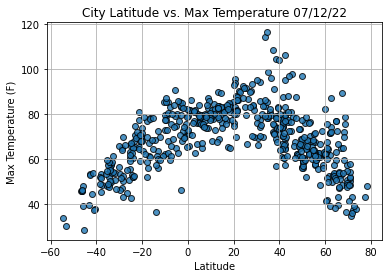

In [17]:
# Import time module

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

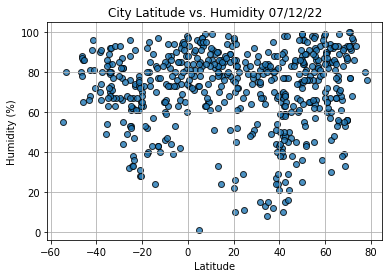

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

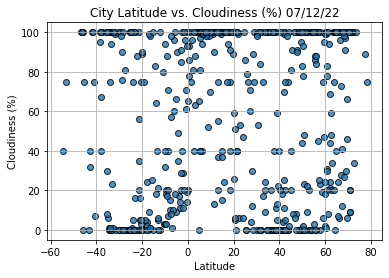

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

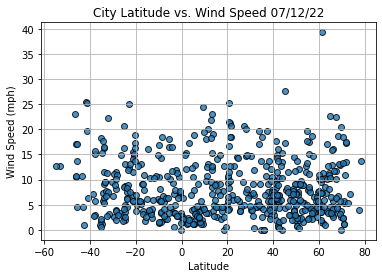

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()